In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Missing values -> remove columns
# GridSearchCV or RandmizedSearchCV
# RandomForestRegressor
# Remove one of the airport fee or congession surcharge


/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# Machine Learning Project

## Name : Saranath P

## Roll no. 21f3002841

### First, we will load the necessary datasets which are available in kaggle already.

In [2]:
data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Now we can see the first 5 rows of data

In [4]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [5]:
data.shape

(175000, 17)

# Exploaratory Data Analysis

 We can fetch the ProfileReport of this given data which can be exceuted the below code and download

In [6]:
from ydata_profiling import ProfileReport

In [7]:
# prof = ProfileReport(data)
# prof.to_file('profile.html')

## Getting the Shape of the DataFrame

In [8]:
data.shape

(175000, 17)

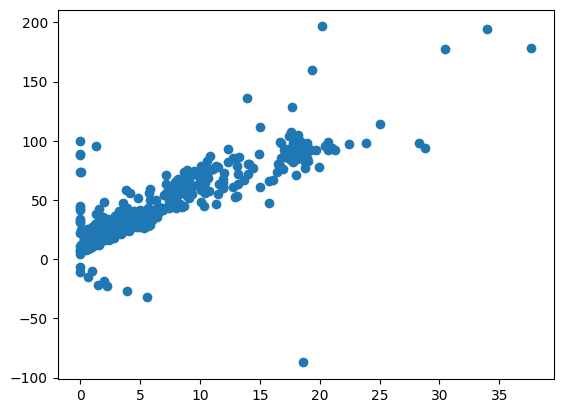

In [9]:
plt.scatter(data['trip_distance'][0:1000], data['total_amount'][0:1000])

# Results on plotting - 1

 Here we see that there is a Linear relationship between `trip_distance` and `total_amount`. So our model should be more linear than having polynomial features.

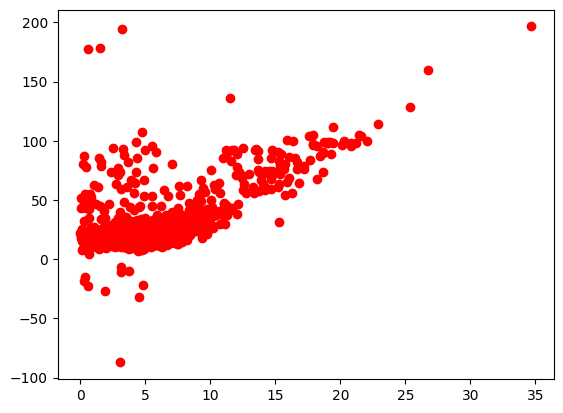

In [10]:
plt.scatter(data['tip_amount'][0:1000], data['total_amount'][0:1000], color = 'red')

# Results on Plotting - 2

This also ensures that our model should be linear. So we need not to have polynomial regression else it will overfit the data.

In [11]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'])
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'])

In [12]:
data['day'] = data['tpep_pickup_datetime'].dt.day
data['hour'] = data['tpep_pickup_datetime'].dt.hour
data['day_of_the_week'] = data['tpep_pickup_datetime'].dt.dayofweek
data['hour1'] = data['tpep_dropoff_datetime'].dt.hour
 

test_data['day'] = test_data['tpep_pickup_datetime'].dt.day
test_data['hour'] = test_data['tpep_pickup_datetime'].dt.hour
test_data['day_of_the_week'] = test_data['tpep_pickup_datetime'].dt.dayofweek
test_data['hour'] = test_data['tpep_dropoff_datetime'].dt.hour

# Let us get how the features are Co-related with each other

In [13]:
data_corr = data.drop('store_and_fwd_flag', axis = 1)
data_corr = data_corr.drop('payment_type', axis = 1)
data_corr

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,day_of_the_week,hour1
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,120,9,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,28,17,2,16
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,15,215,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,29,23,3,22
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,167,223,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,30,10,4,11
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,128,239,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,29,13,3,14
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,203,52,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,29,22,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,147,167,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,30,22,4,22
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,154,191,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,30,13,4,14
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,168,106,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,29,11,3,12
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,240,100,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,29,19,3,19


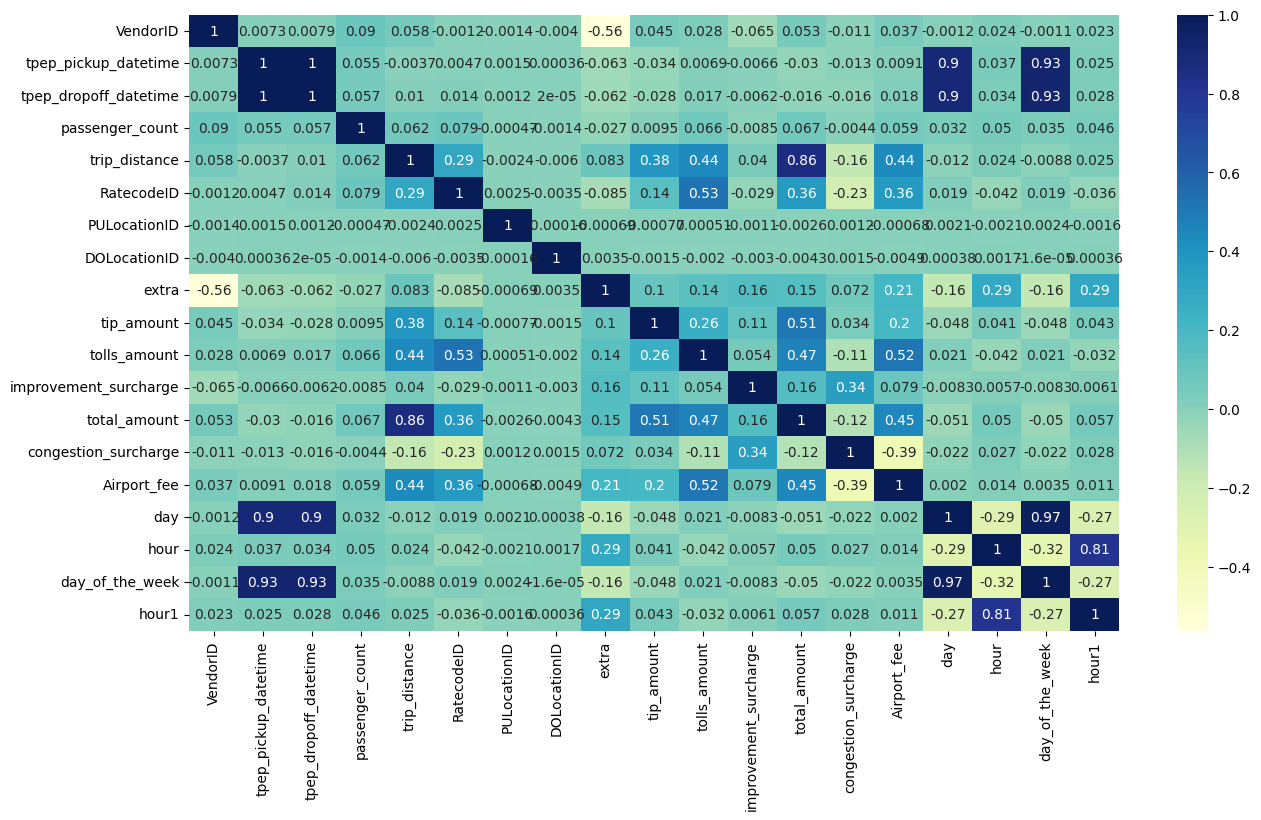

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 8)

sns.heatmap(data_corr.corr(method='spearman'), cmap="YlGnBu", annot = True);

## Corelation Graph

This says that some of the features like `(trip_distance , total_amount)`, `(Airport_fee, total_amount)`, `(passenger_count, total_amount)` have higher corelations.

# Data Cleaning

## Numerical Feaures
`'passenger_count', 'trip_distance', 'extra', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee'`

## Categorical Features
`'RatecodeID', 'PULocationID', 'DULocationID', 'payment_type'`

## Non numeric Features
`'store_and_fwd_flag'`

## Date Feature
`'tpep_pickup_datetime', 'tpep_dropoff_datetime'`

In [15]:
data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
day                         0
hour                        0
day_of_the_week             0
hour1                       0
dtype: int64

In [16]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,day_of_the_week,hour1
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,...,7.165589,0.0,1.0,20.64,2.5,0.0,28,17,2,16
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,...,6.067401,0.0,1.0,25.55,2.5,0.0,29,23,3,22
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,4.111547,0.0,1.0,17.64,2.5,0.0,30,10,4,11
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,6.411079,0.0,1.0,12.80,2.5,0.0,29,13,3,14
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,4.769377,0.0,1.0,18.00,2.5,0.0,29,22,3,22


In [17]:
numeric_features= ['passenger_count', 'trip_distance', 'extra', 'tip_amount', 'improvement_surcharge', 
                          'congestion_surcharge', 'Airport_fee']




categorical_features = ['payment_type', 'RatecodeID']



non_numeric = ['payment_type', 'RatecodeID']

# Simple Imputer

Simple Imputation involves filling in missing values with a statistical measure such as the mean, median, or mode of the observed values in the variable. The goal is to provide a reasonable estimate for the missing values based on the available data.

Here are some common strategies for Simple Imputation:

-     Mean Imputation:
        Fill missing values with the mean of the observed values for that variable.
        Suitable for continuous variables with a roughly symmetric distribution.

-     Median Imputation:
        Fill missing values with the median of the observed values for that variable.
        Suitable for variables with skewed distributions or in the presence of outliers.

-     Mode Imputation:
        Fill missing values with the mode (most frequently occurring value) of the observed values for categorical variables.


Original Dataset with Missing Values:

| Feature 1 | Feature 2 | Feature 3 | Target |
|-----------|-----------|-----------|--------|
| 1.2       | 3.4       | 5.6       | 7.8    |
| 2.1       | NaN       | 4.5       | 6.7    |
| 3.2       | 2.5       | NaN       | 8.9    |
| NaN       | 4.7       | 6.3       | 10.1   |

Dataset after Mean Imputation:

| Feature 1 | Feature 2 | Feature 3 | Target |
|-----------|-----------|-----------|--------|
| 1.2       | 3.4       | 5.6       | 7.8    |
| 2.1       | **3.87**  | 4.5       | 6.7    |
| 3.2       | 2.5       | **5.47**  | 8.9    |
| **2.17**  | 4.7       | 6.3       | 10.1   |

In [18]:
from sklearn.impute import SimpleImputer

data_si = data.copy()
test_data_si = test_data.copy()
si1 = SimpleImputer(strategy = 'mean')
data_si[numeric_features] = si1.fit_transform(data_si[numeric_features])
mean_value1 = si1.statistics_
print(mean_value1)

test_data_si[numeric_features] = si1.transform(test_data_si[numeric_features])
mean_value2 = si1.statistics_
print(mean_value2)

si2 = SimpleImputer(strategy = 'most_frequent')
data_si[non_numeric] = si2.fit_transform(data_si[non_numeric])
test_data_si[non_numeric] = si2.transform(test_data_si[non_numeric])

[1.35767776 5.14593034 1.93214349 6.12749723 0.97968857 2.24697051
 0.15882532]
[1.35767776 5.14593034 1.93214349 6.12749723 0.97968857 2.24697051
 0.15882532]


# Passenger Count Histogram Plotting

The below code extracts and converts the `passenger_count` data to integers. It then plots a histogram to visualize the distribution of passenger counts, with bins defined from 1 to the maximum count plus one. The resulting histogram provides insights into the frequency of different passenger counts in the dataset.

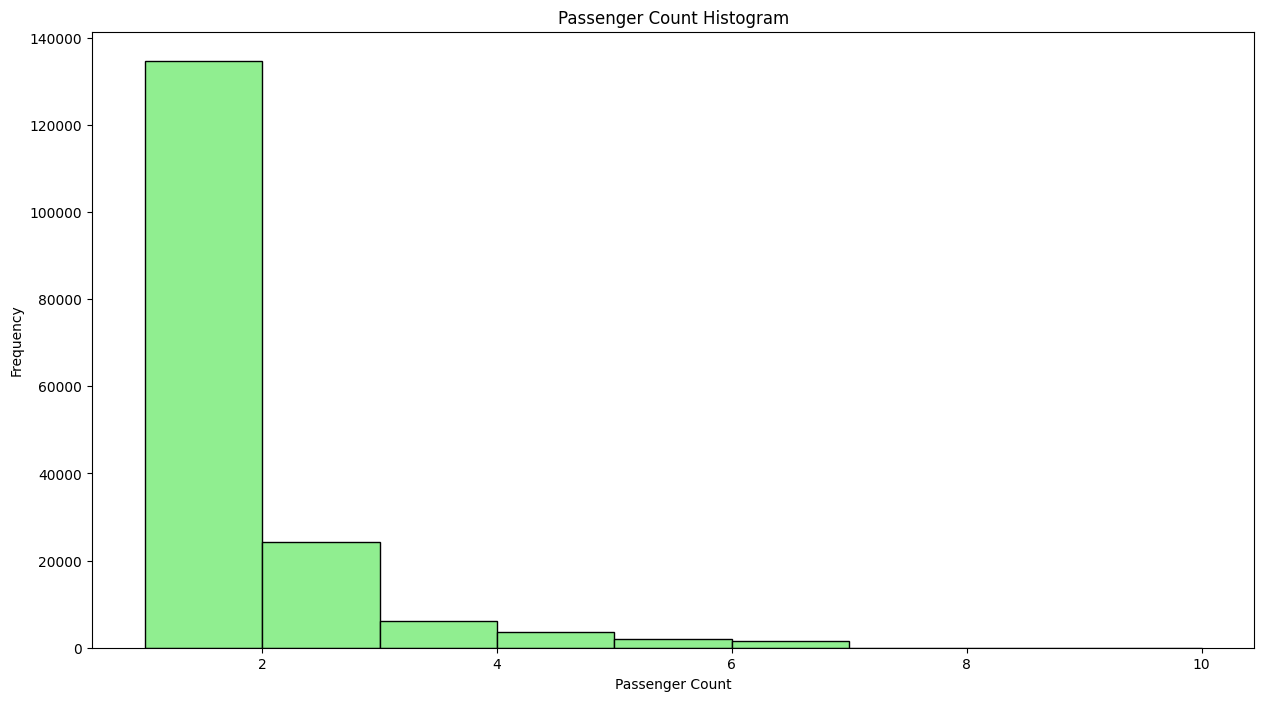

In [19]:
passenger_count_data = data_si['passenger_count']


passenger_count_data = passenger_count_data.astype(int)

# Plotting the histogram
plt.hist(passenger_count_data, bins=range(1, max(passenger_count_data) + 2), edgecolor='black', color = 'lightgreen')
plt.title('Passenger Count Histogram')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

# Results

Here we see that most of the trips are taken when the `passenger_count` is $1$. 

# Feature Engineering -  Changing Time

 We see that `pickup` and `dropoff` time is being useless. So instead of dropping them we can calculate the average time spent by the customer in the taxi.
 We can add that as a column and then proceed our further data analysis


In [20]:
def changeTime(X):


    X['time_difference_seconds'] = (X['tpep_dropoff_datetime'] - X['tpep_pickup_datetime']).astype('timedelta64[ns]').abs()
    X['time_difference_seconds'] = X['time_difference_seconds'].dt.total_seconds()
    
   
    

    
changeTime(data_si)
changeTime(test_data_si)
changeTime(data_corr)
    


# Let us plot and now check the corelation of the new feature with our target variable

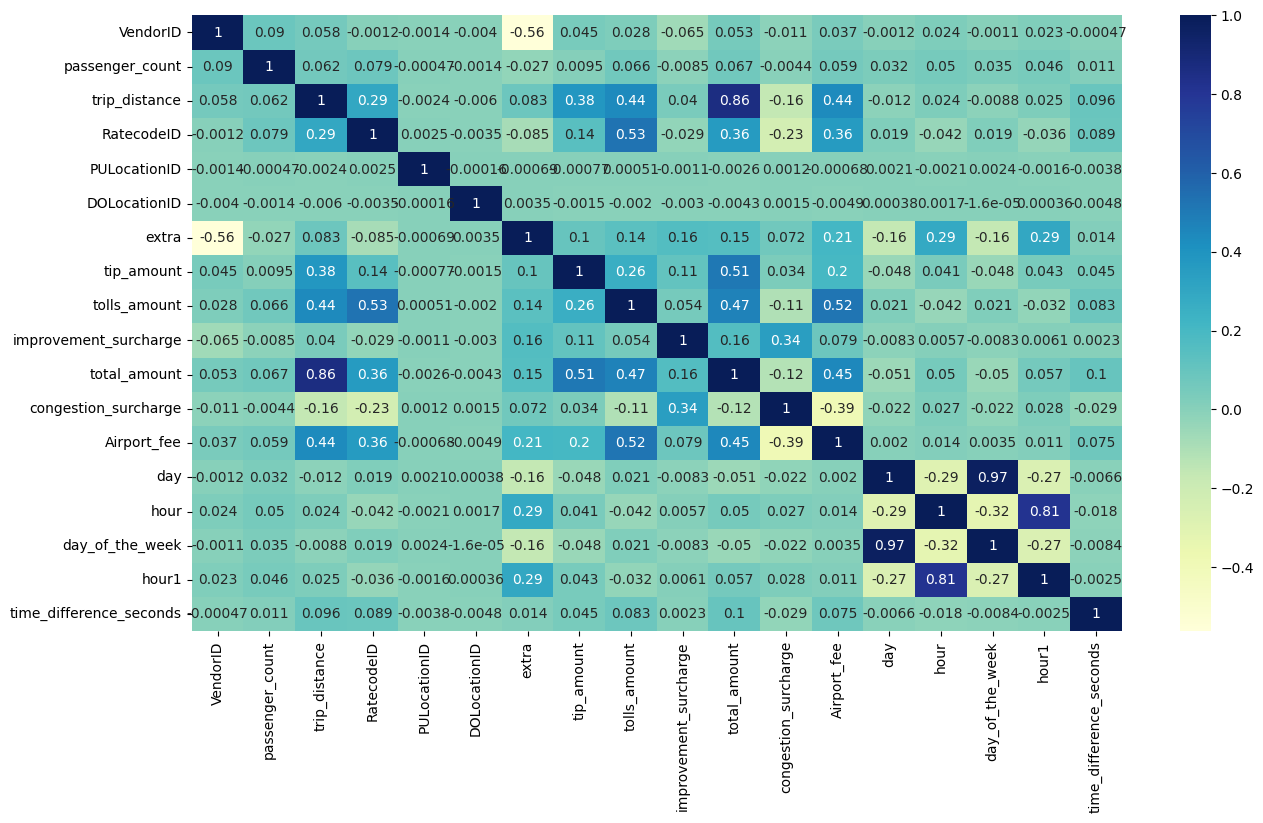

In [21]:
data_corr = data_corr.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)  
sns.heatmap(data_corr.corr(method='spearman'), cmap="YlGnBu", annot=True);

# Advanced Exploratory Data Analysis

### Analyzing Taxi Pickup Patterns

1. **Date-time Conversion:**
   The below code converts the 'tpep_pickup_datetime' column to a datetime format for further analysis.

2. **Monthly Pickup Distribution:**
   It extracts the month and day information, creating a bar plot illustrating the distribution of taxi pickups across different months. The x-axis displays months, and the y-axis represents the frequency of pickups.

3. **Daily Pickup Trends:**
   Another bar plot is generated to visualize the frequency of taxi pickups on each day. The x-axis shows individual days, and the y-axis indicates the corresponding pickup frequencies.

These visualizations provide insights into the temporal patterns of taxi pickups, helping to identify trends and variations over months and days.


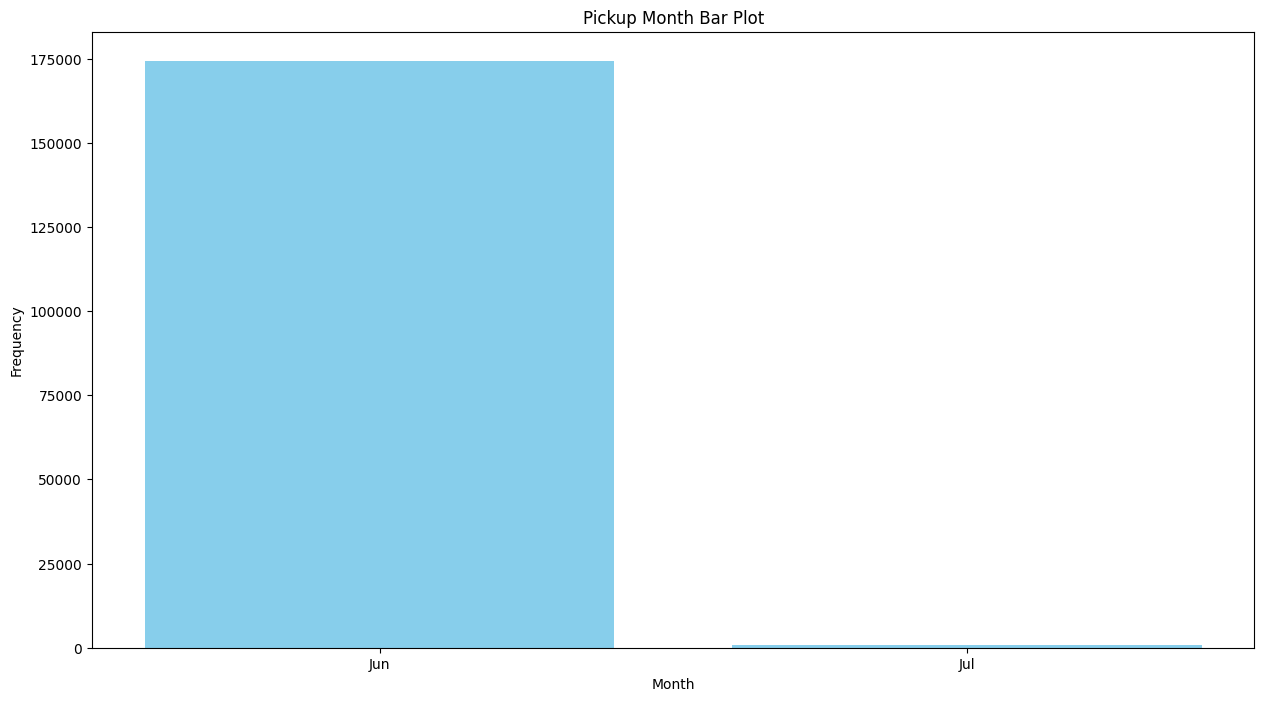

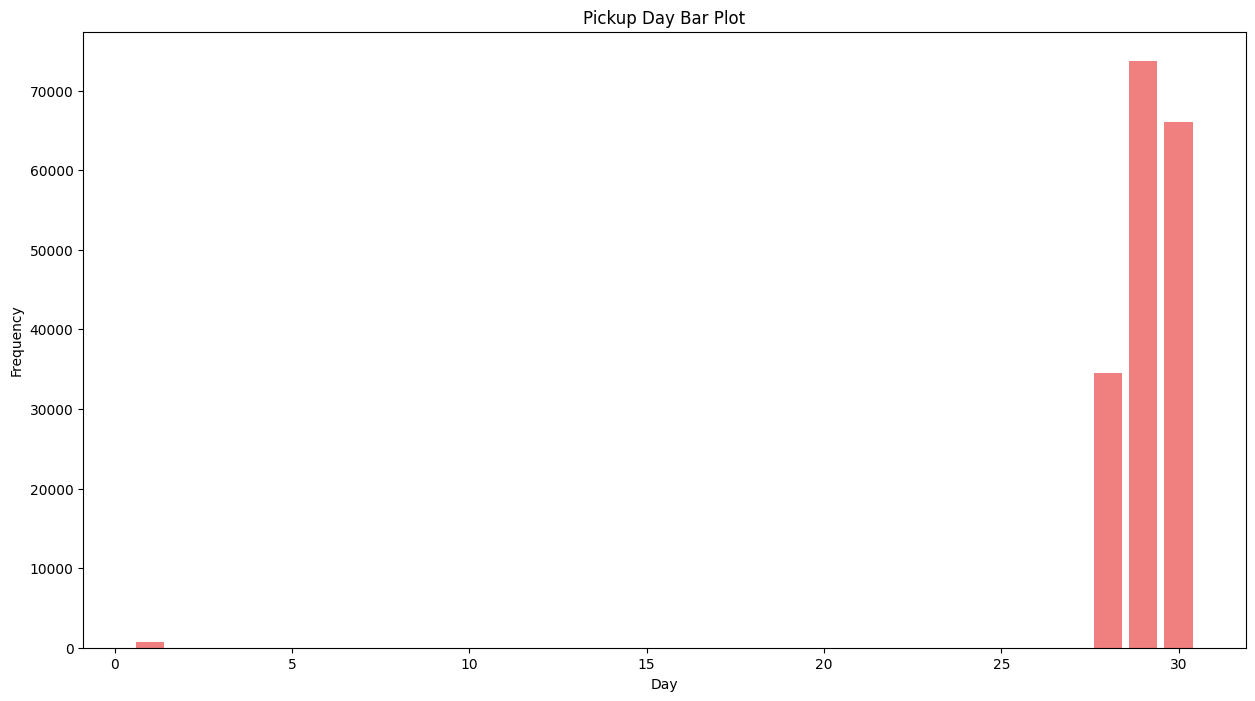

In [22]:

import calendar

data_vi = data_si.copy()

data_vi['tpep_pickup_datetime'] = pd.to_datetime(data_vi['tpep_pickup_datetime'])


data_vi['pickup_month'] = data_vi['tpep_pickup_datetime'].dt.month
data_vi['pickup_day'] = data_vi['tpep_pickup_datetime'].dt.day


month_counts = data_vi['pickup_month'].value_counts().sort_index()
months = [calendar.month_abbr[i] for i in month_counts.index]

plt.bar(months, month_counts, color='skyblue')
plt.title('Pickup Month Bar Plot')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()


day_counts = data_vi['pickup_day'].value_counts().sort_index()

plt.bar(day_counts.index, day_counts, color='lightcoral')
plt.title('Pickup Day Bar Plot')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()


# Some useful results

### Analyzing Limited Taxi Pickup Data (June and July)

1. **Date-time Conversion:**
   The code converts the `tpep_pickup_datetime` column to a datetime format for further analysis.

2. **Monthly Pickup Distribution (June and July):**
   The dataset includes ride details for the months of June and July, with pickups visualized across these two months. The x-axis displays months, and the y-axis represents the frequency of pickups.

3. **Daily Pickup Trends (27th to 29th):**
   A bar plot illustrates the frequency of taxi pickups for the available days, specifically the 27th, 28th, and 29th. The x-axis shows individual days, and the y-axis indicates the corresponding pickup frequencies.

These visualizations provide insights into the limited temporal patterns of taxi pickups, focusing on June and July and a subset of days within those months.

# Dropping Unnecessary Columns

After capturing the `duration`, it is prudent to streamline the dataset by removing redundant columns. The columns `tpep_pickup_datetime` and `tpep_dropoff_datetime` can be safely dropped from both the training and test datasets.

Additionally, based on the correlation analysis, columns like `store_and_fwd_flag`, `PULocationID`, and `DOLocationID` show minimal correlation and can be safely removed to simplify the dataset and improve computational efficiency.

The streamlined dataset will retain essential information, enhancing model training and evaluation processes.

In [23]:
data_si.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis = 1, inplace = True)
test_data_si.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis = 1, inplace = True)

In [24]:
data_si = data_si.drop('store_and_fwd_flag', axis = 1)
test_data_si = test_data_si.drop('store_and_fwd_flag', axis = 1)

In [25]:
data_si.head(5)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,day_of_the_week,hour1,time_difference_seconds
0,1,1.0,2.14,1.0,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,28,17,2,16,2736.0
1,0,1.0,2.70,1.0,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,29,23,3,22,3806.0
2,1,1.0,1.15,1.0,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,30,10,4,11,3219.0
3,0,1.0,0.40,1.0,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,29,13,3,14,3412.0
4,1,3.0,1.10,1.0,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,29,22,3,22,1130.0


In [26]:

data_si = data_si.drop('PULocationID', axis = 1)
data_si = data_si.drop('DOLocationID', axis = 1)


test_data_si = test_data_si.drop('PULocationID', axis = 1)
test_data_si = test_data_si.drop('DOLocationID', axis = 1)

In [27]:
data_si.head(5)

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,day_of_the_week,hour1,time_difference_seconds
0,1,1.0,2.14,1.0,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,28,17,2,16,2736.0
1,0,1.0,2.70,1.0,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,29,23,3,22,3806.0
2,1,1.0,1.15,1.0,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,30,10,4,11,3219.0
3,0,1.0,0.40,1.0,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,29,13,3,14,3412.0
4,1,3.0,1.10,1.0,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,29,22,3,22,1130.0


In [28]:
# from sklearn.impute import KNNImputer

# from sklearn.preprocessing import LabelEncoder

# data_knn = data.copy()
# test_data_knn = test_data.copy()
# knn1 = KNNImputer(n_neighbors = 5000,weights = 'distance')
# data_knn[numeric_features_test] = knn1.fit_transform(data_knn[numeric_features])

# test_data_knn[numeric_features_test] = knn1.transform(test_data_knn[numeric_features])

# si2 = SimpleImputer(strategy = 'most_frequent')
# data_knn[non_numeric] = si2.fit_transform(data_knn[non_numeric])
# test_data_knn[non_numeric] = si2.transform(test_data_knn[non_numeric])



In [29]:
# knn1.feature_names_in_

In [30]:
# plt.scatter(data_si['passenger_count'], data_si['total_amount'])

In [31]:
data_si[data_si.isna().any(axis=1)]

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,day,hour,day_of_the_week,hour1,time_difference_seconds


In [32]:
test_data_si[data_si.isna().any(axis=1)]

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,day,hour,day_of_the_week,time_difference_seconds


# Splitting it into Train Test Split and having a train data to train an dvalidation data to check

With the help of `train_test_split` function from `model_selection` we can divide our dataset into train data and validation data.

## Train data
This is used to make the machine learning model. We use this data to train our model

## Validation data
We perform Hyperparameter tuning on this dataset to get good parameters and use it in our model.


In [33]:
X = data_si.copy()
X_test = test_data_si.copy()
label = ['total_amount']
y = X['total_amount']

X.drop(label, axis = 1, inplace = True)

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import xgboost

from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_val.shape



((140000, 16), (35000, 16))

In [36]:
X_train.shape

(140000, 16)

## Some visualizations between highly corelated columns and target variable.

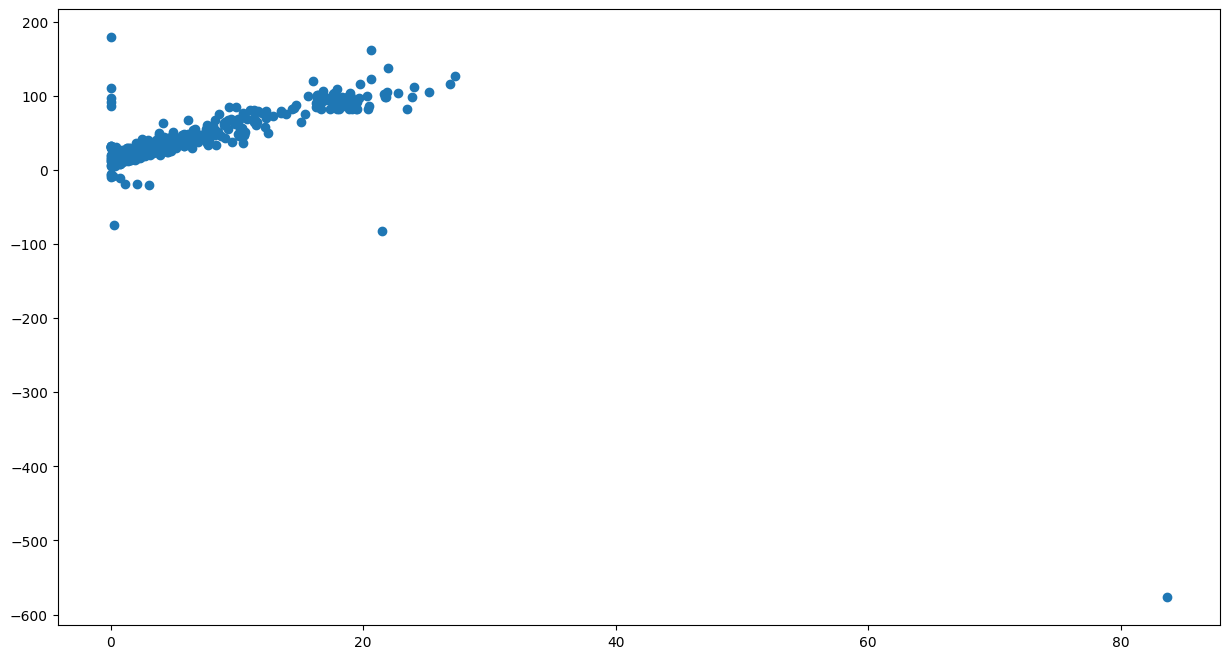

In [37]:
plt.scatter(X_train['trip_distance'][0:1000], y_train[0:1000])

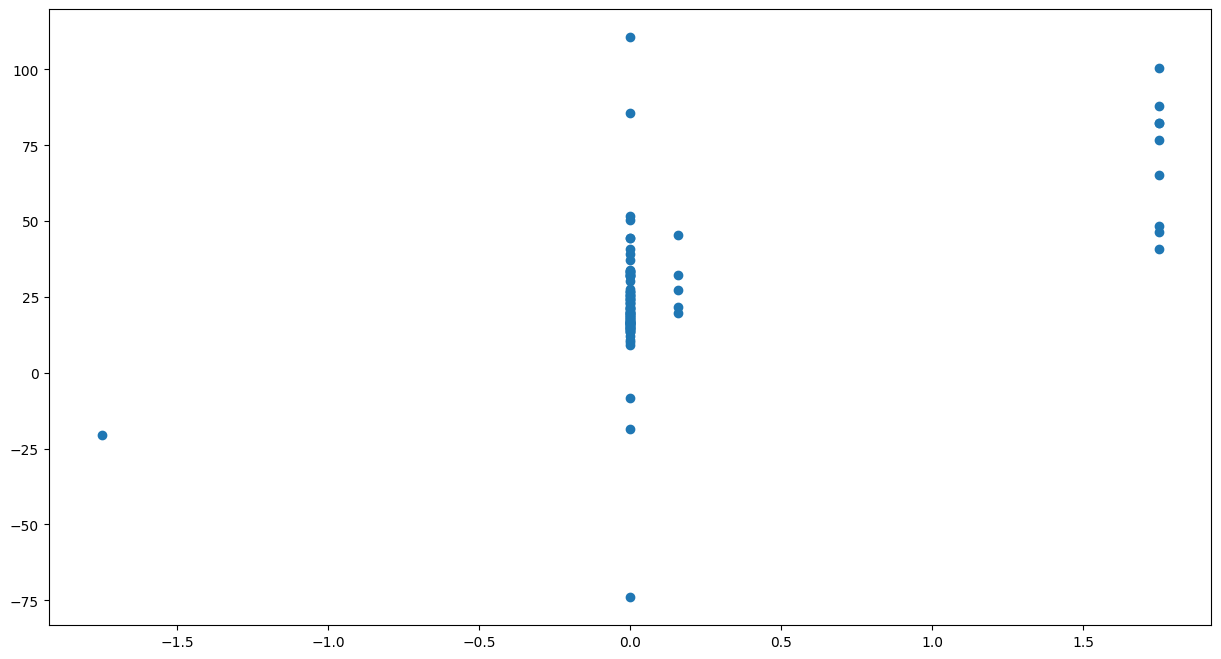

In [38]:
plt.scatter(X_train['Airport_fee'][0:100], y_train[0:100])

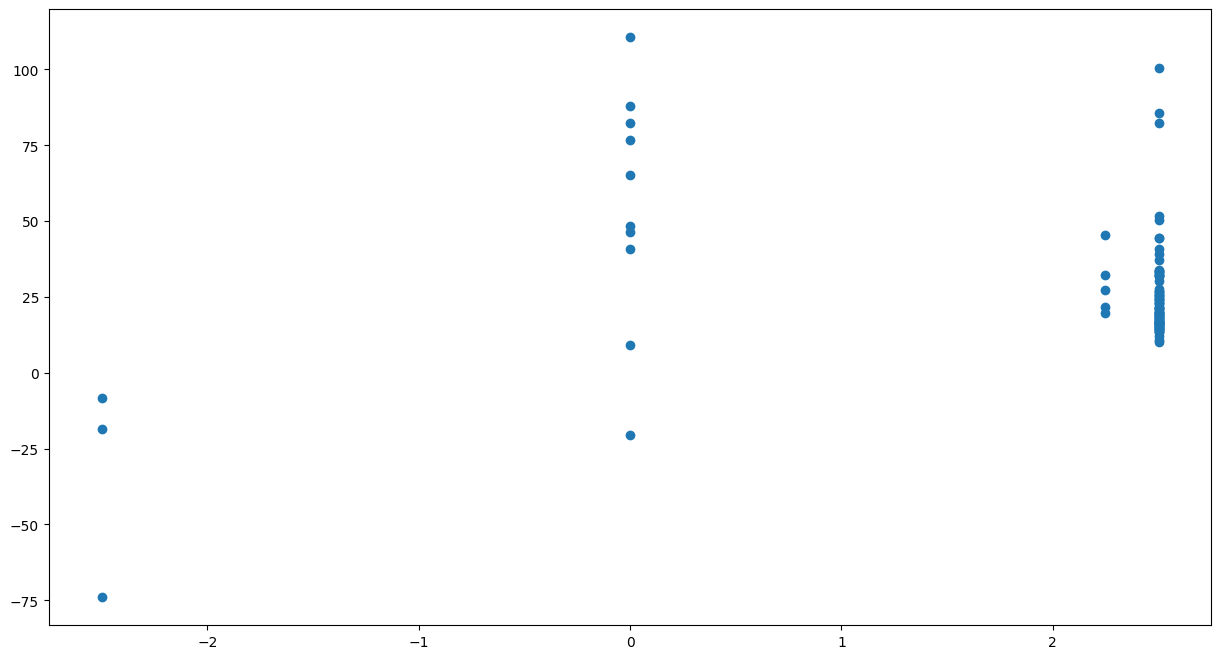

In [39]:
plt.scatter(X_train['congestion_surcharge'][0:100], y_train[0:100])

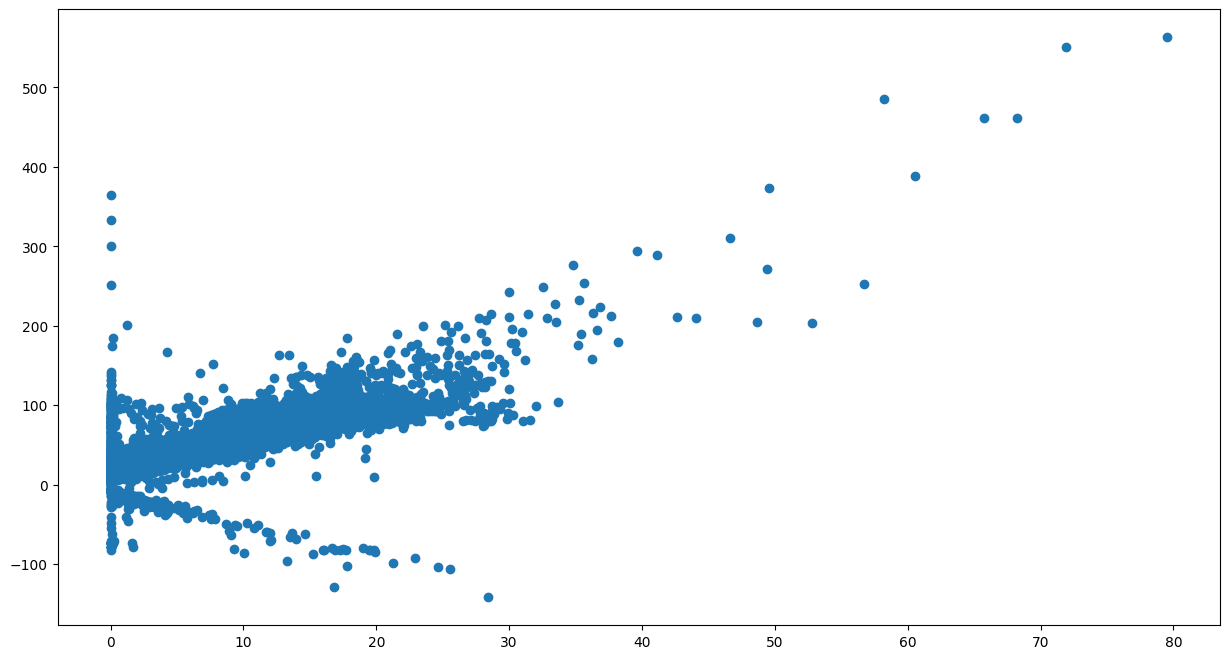

In [40]:
plt.scatter(X_val['trip_distance'], y_val)

# Performing One Hot Encoding for Categorical Variables

## One-Hot Encoding Overview

One-hot encoding is a technique used to represent categorical variables as binary vectors. In this method, each unique category is transformed into a new binary column, and only one of these columns is `hot` (set to 1) for each observation, indicating the category's presence. This is particularly useful for machine learning algorithms that require numerical input, as it eliminates the implicit ordinal relationship in categorical data.


Consider a dataset with a 'Color' column containing categories like `Red`, `Green`, and `Blue`. After one-hot encoding:



| Color  | Red | Green | Blue |
|--------|-----|-------|------|
| Red    | 1   | 0     | 0    |
| Green  | 0   | 1     | 0    |
| Blue   | 0   | 0     | 1    |
| Red    | 1   | 0     | 0    |

Here, the `Color` column is replaced with three binary columns representing each category. The presence of a color is indicated by the `hot` ($1$) column, providing a numerical representation suitable for machine learning models.

In [41]:
enc_X_train= pd.get_dummies(X_train, columns = categorical_features)
enc_X_val= pd.get_dummies(X_val, columns = categorical_features)
enc_X_test= pd.get_dummies(X_test, columns = categorical_features)

In [42]:
enc_X_train.shape, enc_X_test.shape, enc_X_val.shape

((140000, 25), (50000, 25), (35000, 25))

In [43]:
common_columns = list(set(enc_X_train.columns) & set(enc_X_test.columns) & set(enc_X_val.columns))
enc_X_train = enc_X_train[common_columns]
enc_X_test = enc_X_test[common_columns]
enc_X_val = enc_X_val[common_columns]

In [44]:
enc_X_train

,congestion_surcharge,tip_amount,extra,improvement_surcharge,day_of_the_week,RatecodeID_1.0,payment_type_Credit Card,payment_type_Cash,Airport_fee,RatecodeID_5.0,...,RatecodeID_4.0,RatecodeID_99.0,tolls_amount,RatecodeID_2.0,day,passenger_count,RatecodeID_3.0,time_difference_seconds,trip_distance,payment_type_unknown
143961,0.0,7.956385,1.0,1.0,3,True,True,False,1.75,False,...,False,False,0.0,False,29,1.0,False,2123.0,7.79,False
170292,2.5,2.276785,2.5,1.0,2,True,True,False,0.00,False,...,False,False,0.0,False,28,1.0,False,942.0,0.79,False
161029,-2.5,1.062698,0.0,-1.0,4,False,False,False,0.00,False,...,False,False,0.0,True,30,1.0,False,312.0,0.29,True
84006,2.5,2.444217,3.5,1.0,3,True,True,False,0.00,False,...,False,False,0.0,False,29,1.0,False,4067.0,0.60,False
95628,2.5,5.163920,5.0,1.0,2,True,True,False,0.00,False,...,False,False,0.0,False,28,1.0,False,1449.0,1.90,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,3.260969,0.0,1.0,4,True,True,False,0.00,False,...,False,False,0.0,False,30,1.0,False,1033.0,1.49,False
103694,2.5,3.382305,2.5,1.0,4,True,True,False,0.00,False,...,False,False,0.0,False,30,1.0,False,2810.0,1.60,False
131932,2.5,6.751209,2.5,1.0,3,True,True,False,0.00,False,...,False,False,0.0,False,29,1.0,False,1553.0,1.80,False
146867,2.5,1.815167,2.5,1.0,4,True,False,True,0.00,False,...,False,False,0.0,False,30,1.0,False,4011.0,0.60,False


In [45]:
enc_X_train.shape

(140000, 24)

# Models

Now we have looked up the preprocessing part where we managed the pickup time and dropoff time and then removed some less corelated features, we will try to fit in a model. We will be seeing various models like,

1. LinearRegression
2. RidgeRegression
3. LassoRegression

4. DescionTreeRegressor
5. Support Vector Regressor (Linear)

6. RandomForestregressor
7. GradientBoosting
8. XGBoostRegressor

# Linear Regression

## Linear Regression in `sklearn.linear_model`

In sklearn.linear_model, linear regression is implemented through the LinearRegression class. Linear regression models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The goal is to find the best-fit line that minimizes the sum of squared differences between predicted and actual values.

### Key Parameters:

-    `fit_intercept`: Whether to calculate the intercept (True by default).
-    `normalize`: If True, the regressors are normalized before regression.

### Methods:

-    `fit(X, y)`: Fit linear model to the training data.
-    `predict(X)`: Predict using the linear model.
    
    
### Linear Regression Example

Suppose we have a dataset with one independent variable $X$ and a dependent variable $y$. The linear regression model can be expressed mathematically as:

$$
y = mx + b
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $m$ is the slope (coefficient),
- $b$ is the intercept.


#### Model Fitting
We aim to fit the linear regression model to this data using the formula:

$$ 
w = (X^T X)^{-1} X^T y 
$$

where:
- $ X $ is the matrix of input features,
- $ y $ is the vector of target values,
- $ (X^T X)^{-1} $ is the inverse of the transpose of $ X $ multiplied by $ X $,
- $ X^T $ is the transpose of $X$.

In simpler terms, the coefficients $ w $ are calculated by multiplying the pseudo-inverse of $X^T X$ with $X^T y$.

0.7727522222405251


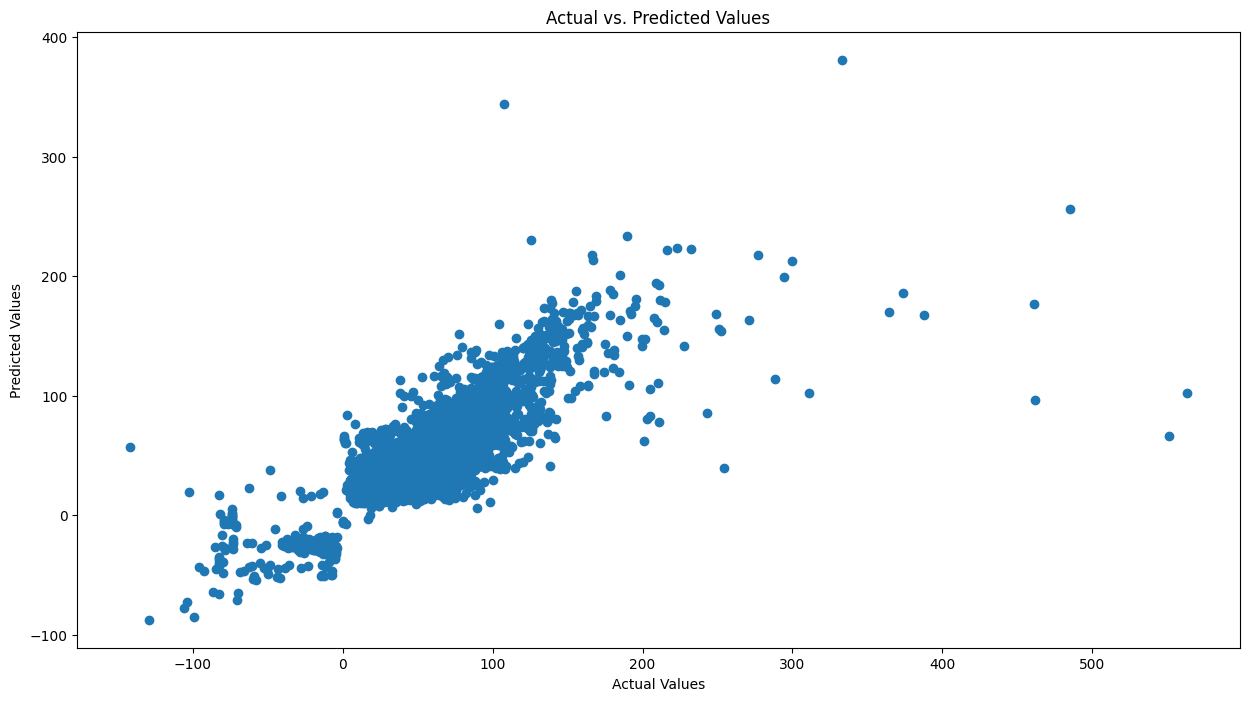

In [46]:
# Basic Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(enc_X_train,y_train)
print(lin_reg.score(enc_X_val,y_val))
y_pred = lin_reg.predict(enc_X_val)


plt.scatter(y_val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()



# Utilizing `Pipeline` in `scikit-learn`

`Pipeline` in scikit-learn is a convenient tool for streamlining a lot of the routine processes, especially in machine learning workflows. It sequentially applies a list of transforms and a final estimator. This is particularly useful when there are multiple data processing steps before applying a machine learning model.

## Key Benefits:
1. **Simplicity:**
   `Pipeline` helps in organizing the workflow by encapsulating feature scaling, imputation, and modeling steps in a single object, making the code more concise and readable.

2. **Preventing Data Leakage:**
   It ensures that all transformations are applied to the training data and transferred to the test data consistently, preventing data leakage during the modeling process.

3. **Ease of Use:**
   The pipeline can be used like any other estimator, providing a unified interface for fitting, transforming, and predicting.

In [47]:
# Let us use Pipeline and get it

from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

transformer = StandardScaler()

pca = PCA()
regressor = LinearRegression()


regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

pipeline1 = Pipeline(steps=[('s',pca),('m',regr)])


pipeline1.fit(enc_X_train, y_train)


print(pipeline1.score(enc_X_val, y_val))

0.7727522222405253


# Ridge Regression

## Ridge Regression in `sklearn.linear_model`

In scikit-learn, Ridge regression is implemented through the Ridge class. It's a regularized linear regression method that adds a penalty term to the linear regression objective, helping prevent overfitting by shrinking the coefficients.

#### Key Parameters:
- `alpha`: Regularization strength. Higher values increase the regularization effect.

#### Methods:
- `fit(X, y)`: Fit Ridge model to the training data.
- `predict(X)`: Predict using the Ridge model.

### Ridge Regression Example

Suppose we have a dataset with one independent variable $X$ and a dependent variable $y$. The Ridge regression model can be expressed mathematically as:

$$
y = mx + b
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $m$ is the slope (coefficient),
- $b$ is the intercept.

#### Model Fitting
We aim to fit the Ridge regression model to this data using the formula:

$$ 
w = (X^T X + \alpha I)^{-1} X^T y 
$$

where:
- $ X $ is the matrix of input features,
- $ y $ is the vector of target values,
- $ \alpha $ is the regularization strength,
- $ I $ is the identity matrix,
- $ (X^T X + \alpha I)^{-1} $ is the inverse of the transpose of $ X $ multiplied by $ X $ plus the regularization term.

In simpler terms, the coefficients $ w $ are calculated by multiplying the pseudo-inverse of $X^T X + \alpha I$ with $X^T y$.

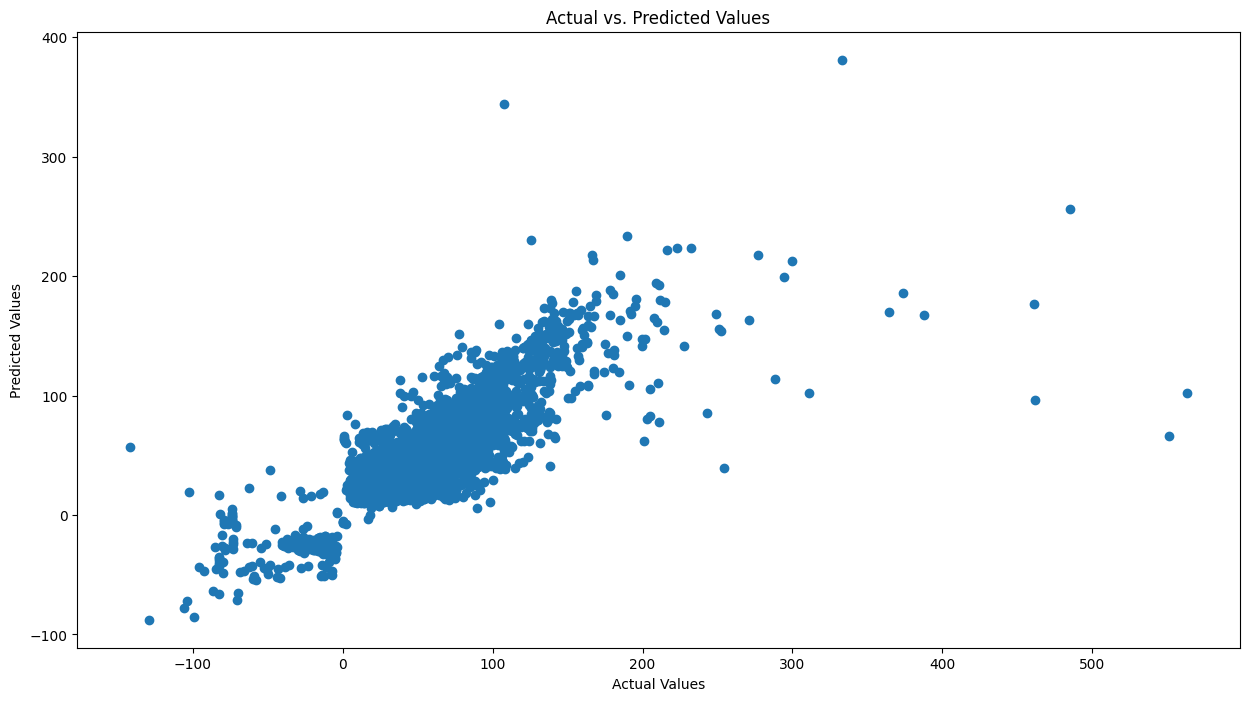

In [48]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(enc_X_train,y_train)
ridge_reg.score(enc_X_val,y_val)
y_pred = ridge_reg.predict(enc_X_val)


plt.scatter(y_val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [49]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(
    alphas = [0.5, 1, 1.25, 1.5],
    cv = 5
)
ridgecv.fit(enc_X_train, y_train)
print(ridgecv.best_score_)
ridgecv.score(enc_X_val, y_val)

0.7713040580878878


0.7727348602954766

## Principal Component Analysis (PCA)

### PCA in `sklearn.decomposition`

In scikit-learn, Principal Component Analysis (PCA) is implemented through the PCA class. PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional representation by capturing the most significant variance in the data.

#### Key Parameters:
- `n_components`: Number of components to retain after dimensionality reduction.

#### Methods:
- `fit(X)`: Fit the PCA model to the training data.
- `transform(X)`: Transform the input data to its lower-dimensional representation.
- `fit_transform(X)`: Fit the model and transform the input data simultaneously.

## Error Minimization and $w^TCw$ Maximization in PCA

Principal Component Analysis (PCA) aims to reduce the dimensionality of data while preserving the most significant information. Two key concepts in PCA involve minimizing reconstruction error and maximizing \(w^TCw\), where \(w\) is the weight vector and \(C\) is the covariance matrix.

### Error Minimization

In PCA, error minimization involves reducing the difference between the original data and its lower-dimensional representation. The error is measured as the sum of squared differences between the original data points and their projections onto the principal components.

#### Objective Function:
$ \text{minimize} \sum_{i=1}^{n} ||X_i - X_{\text{proj},i}||^2 $

where:
- $X_i$ is the original data point,
- $X_{\text{proj},i}$ is its projection onto the lower-dimensional space.

### $w^TCw$ Maximization

In PCA, the weight vector \(w\) is crucial for determining the principal components. Maximizing \(w^TCw\) ensures that the variance along the principal components is maximized.

#### Objective Function:
$ \text{maximize} \ w^TCw $

where:
- $w$ is the weight vector,
- $C$ is the covariance matrix.



In [50]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

transformer = StandardScaler()

pca = PCA()
regressor = RidgeCV(
    alphas = [0.5, 1, 1.25, 1.5],
    cv = 5
)

regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

pipeline2 = Pipeline(steps=[('s',pca),('m',regr)])


pipeline2.fit(enc_X_train, y_train)


print(pipeline2.score(enc_X_val, y_val))


0.7727348602954763


# Lasso Regression

## Lasso Regression in `sklearn.linear_model`

In scikit-learn, Lasso regression is implemented through the Lasso class. Like Ridge regression, Lasso is a regularized linear regression method that adds a penalty term to the linear regression objective, promoting sparsity in the coefficients.

#### Key Parameters:
- `alpha`: Regularization strength. Higher values increase the regularization effect.

#### Methods:
- `fit(X, y)`: Fit Lasso model to the training data.
- `predict(X)`: Predict using the Lasso model.

### Lasso Regression Example

Suppose we have a dataset with one independent variable $X$ and a dependent variable $y$. The Lasso regression model can be expressed mathematically as:

$$
y = mx + b
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $m$ is the slope (coefficient),
- $b$ is the intercept.

#### Model Fitting
We aim to fit the Lasso regression model to this data using the formula:

$$ 
w = \text{argmin} \left( \frac{1}{2n} ||Xw - y||_2^2 + \alpha ||w||_1 \right)
$$

where:
- $ X $ is the matrix of input features,
- $ y $ is the vector of target values,
- $ \alpha $ is the regularization strength,
- $ ||\cdot||_2^2 $ is the L2 norm,
- $ ||\cdot||_1 $ is the L1 norm.

In simpler terms, the coefficients $ w $ are determined by minimizing the sum of squared differences and the regularization term.

0.758172920843054


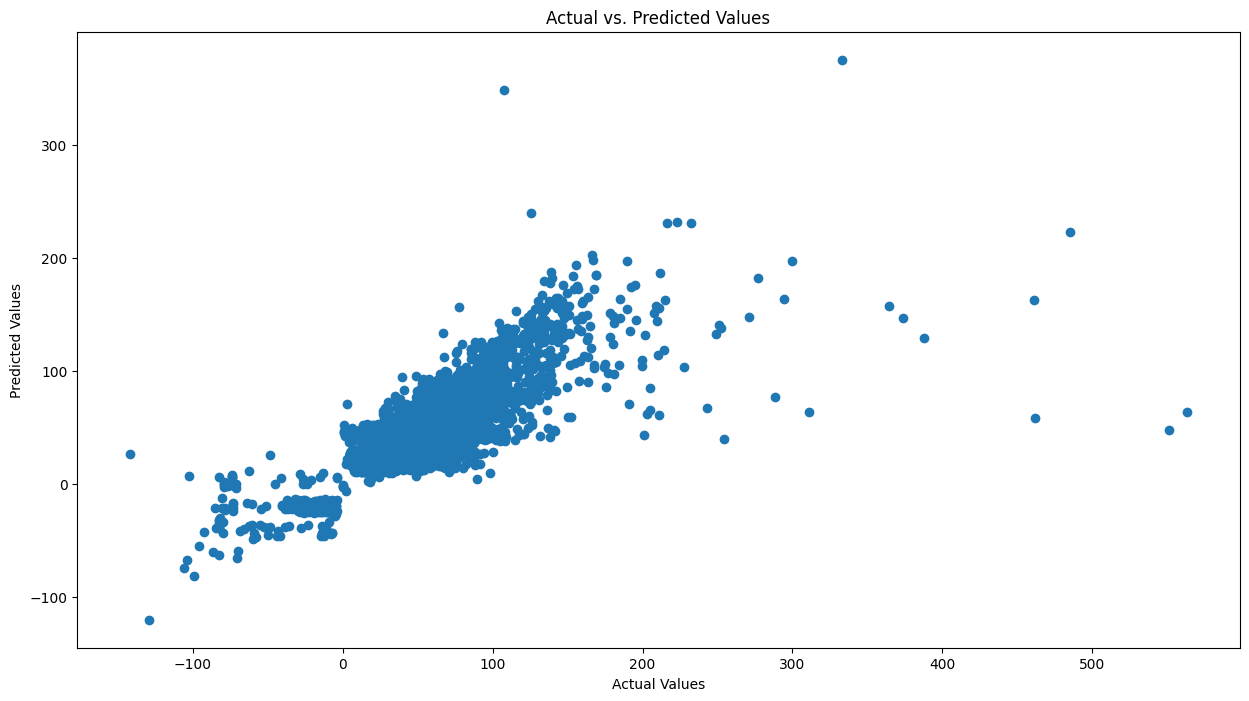

In [51]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(enc_X_train,y_train)
print(lasso_reg.score(enc_X_val,y_val))
y_pred = lasso_reg.predict(enc_X_val)


plt.scatter(y_val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [52]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(
    alphas = [0.5, 1, 1.25, 1.5],
    cv = 5,
    random_state = 42
)
lassocv.fit(enc_X_train, y_train)
lassocv.score(enc_X_val, y_val)

0.7287078672887031

In [53]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

transformer = StandardScaler()

pca = PCA()
regressor = LassoCV(
    alphas = [ 0.5, 1, 1.25, 1.5],
    cv = 5,
    random_state = 42
)

regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

pipeline3 = Pipeline(steps=[('s',pca),('m',regr)])


pipeline3.fit(enc_X_train, y_train)


print(pipeline3.score(enc_X_val, y_val))


0.5639845840729996


# Decision Tree Regressor

## Overview

A Decision Tree Regressor is a supervised machine learning algorithm used for regression tasks. It predicts continuous values by recursively splitting the dataset based on features.

## Structure

- **Root Node:** Initial decision or test.
- **Decision Nodes:** Test specific features, leading to branches.
- **Leaf Nodes:** Contain the predicted value.

## Decision-Making Process

1. **Splitting:** Dataset divided based on a feature and threshold.
2. **Recursive Splitting:** Process continues until a stopping criterion.
3. **Leaf Node Prediction:** Leaf nodes hold the predicted value.


## Advantages

- **Interpretability:** Transparent decision-making process.
- **Non-Linear Relationships:** Can capture non-linear patterns.
- **Robust to Outliers:** Less sensitive to outliers.

## Limitations

- **Overfitting:** Prone to overfitting if not controlled.
- **Instability:** Small data variations can lead to different structures.

## Use Cases

- **Predictive Modeling:** Used in finance, healthcare, and marketing.
- **Regression Analysis:** Predicting continuous target variables.
- **Anomaly Detection:** Identifying outliers in data.

## Decision Tree Regressor in `sklearn.tree`

In scikit-learn, Decision Tree Regressor is implemented through the DecisionTreeRegressor class. Unlike Linear Regression, Decision Trees model the relationship between features and target in a non-linear, hierarchical manner.

#### Key Parameters:
- `max_depth`: Maximum depth of the tree.
- `min_samples_split`: Minimum number of samples required to split an internal node.
- `min_samples_leaf`: Minimum number of samples required to be at a leaf node.

#### Methods:
- `fit(X, y)`: Fit the Decision Tree model to the training data.
- `predict(X)`: Predict using the Decision Tree model.


Decision Tree Regressors are valuable for regression tasks, offering interpretability and versatility. However, care must be taken to prevent overfitting and ensure robust performance through parameter tuning.

0.9451524371007003


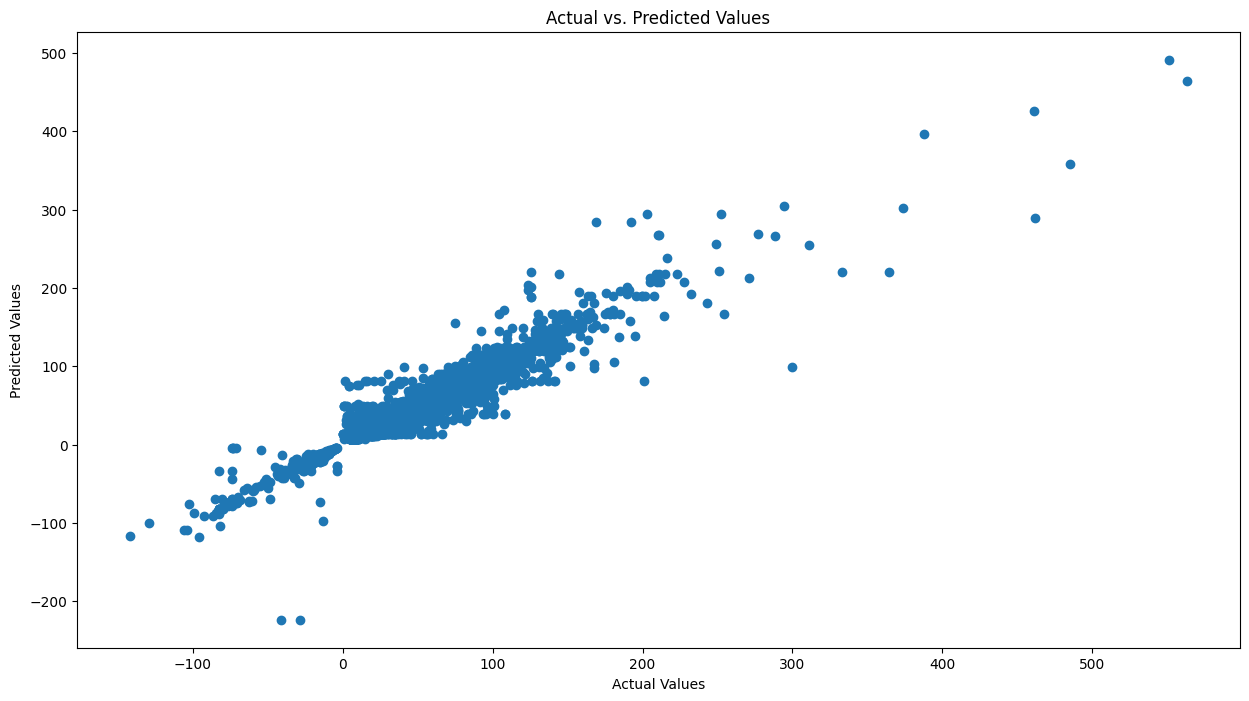

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42, max_depth = 11)
dt.fit(enc_X_train, y_train)

print(dt.score(enc_X_val,y_val))
y_pred = dt.predict(enc_X_val)


plt.scatter(y_val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [55]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'criterion' : ["squared_error", "friedman_mse"],
#     'max_depth' : [9, 10, 11]
# }

# grid_dt = GridSearchCV(
#     DecisionTreeRegressor(random_state = 42),
#     param_grid,
#     cv = 3
# )
# grid_dt.fit(enc_X_train, y_train)
# print(grid_dt.best_params_)
# print(grid_dt.score(enc_X_val, y_val))
# y_pred = grid_dt.predict(enc_X_val)


# plt.scatter(y_val, y_pred)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values")
# plt.show()

In [56]:
# from sklearn.compose import TransformedTargetRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA

# transformer = StandardScaler()

# pca = PCA()
# regressor = grid_dt


# regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

# pipeline3 = Pipeline(steps=[('s',pca),('m',regr)])


# pipeline3.fit(enc_X_train, y_train)

# pipeline3.score(enc_X_val, y_val)


# Support Vector Regression (SVR)

## Overview

Support Vector Regression (SVR) is a regression algorithm based on Support Vector Machines (SVM) principles. It's designed to predict continuous values.

## Key Concepts

- **Support Vectors:** Key data points influencing the model.
- **Hyperplane:** Decision boundary maximizing margin.
- **Kernel Trick:** Mapping features to higher-dimensional space for non-linear relationships.

## How SVR Works

1. **Support Vectors Selection:** Identifies key data points influencing the model.
2. **Hyperplane Construction:** Builds a hyperplane to maximize the margin between predicted values.
3. **Regression Prediction:** Predicts values based on the hyperplane.

## Loss Function

SVR aims to minimize the loss function, which is associated with the error between the predicted values and the actual values. The loss function is defined as:

$$ \text{minimize} \ \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \left( \max(0, |y_i - f(x_i)| - \varepsilon) \right)^2 $$

where:
- $w$ is the weight vector,
- $C$ is the cost parameter controlling the trade-off between smoothness and accuracy,
- $n$ is the number of data points,
- $y_i$ is the true value for the \(i\)-th data point,
- $f(x_i)$ is the predicted value for the \(i\)-th data point,
- $\varepsilon$ is the width of the tube around the hyperplane.

This loss function seeks to minimize the sum of squared errors within the tube, while also minimizing the norm of the weight vector \(w\). The parameter \(\varepsilon\) controls the width of the tube around the hyperplane. Adjusting \(C\) influences the balance between fitting the training data and maintaining a smooth model.

## Key Parameters

1. **C (Cost):** Controls the trade-off between smoothness and accuracy.
2. **Epsilon ($\varepsilon$):** Width of the tube around the hyperplane.

## Advantages

- **Effective in High-Dimensional Spaces:** Suitable for datasets with many features.
- **Versatile Kernel Functions:** Handles non-linear relationships well.

## Limitations

- **Sensitivity to Noise:** Sensitive to outliers in the training data.
- **Model Complexity:** Choice of kernel and parameters requires careful consideration.





SVR is a powerful regression technique, especially useful in high-dimensional spaces and for capturing non-linear relationships. Proper tuning of hyperparameters is essential for optimal performance.

In [57]:
# from sklearn.svm import LinearSVR

# li_svr = LinearSVR(random_state = 42, epsilon = 0.5, C = 0.8, loss = 'squared_epsilon_insensitive')
# li_svr.fit(enc_X_train, y_train)
# li_svr.score(enc_X_val, y_val)

In [58]:
# y_pred = li_svr.predict(enc_X_val)


# plt.scatter(y_val, y_pred)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values")
# plt.show()

# Random Forest Regressor


## Overview

Random Forest Regressor is an ensemble learning algorithm that builds a multitude of decision trees to create a robust and accurate predictive model. It's particularly effective for regression tasks.

## Key Concepts

- **Ensemble Learning:** Combines multiple decision trees for improved accuracy and generalization.
- **Decision Trees:** Individual models in the ensemble that contribute to the final prediction.
- **Bagging:** Training each tree on a different subset of the data.

## How Random Forest Regressor Works

1. **Bootstrap Sampling:** Randomly selects subsets of the training data with replacement.
2. **Decision Tree Construction:** Builds multiple decision trees with different subsets.
3. **Aggregation:** Averages predictions from all trees to make the final prediction.

## Loss Function

Random Forest Regressor doesn't explicitly optimize a loss function during training. Instead, it relies on the averaging of predictions from multiple trees to reduce overfitting.

## Key Parameters

1. **Number of Trees (n_estimators):** Number of decision trees in the forest.
2. **Max Depth (max_depth):** Maximum depth of each decision tree.
3. **Min Samples Split (min_samples_split):** Minimum number of samples required to split an internal node.
4. **Min Samples Leaf (min_samples_leaf):** Minimum number of samples required to be in a leaf node.

## Advantages

- **High Accuracy:** Typically provides high predictive accuracy.
- **Robust to Overfitting:** Averaging over multiple trees reduces overfitting.
- **Feature Importance:** Can evaluate the importance of different features.

## Limitations

- **Lack of Interpretability:** Not as interpretable as simpler models.
- **Computational Intensity:** Can be resource-intensive for large datasets.

Random Forest Regressor is a powerful algorithm known for its accuracy and robustness. It's particularly useful when interpretability is not the primary concern and when dealing with complex relationships in data.

In [59]:
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(n_estimators = 100, max_depth = None, random_state = 42,
#                           warm_start = True, n_jobs = -1)

# rf.fit(enc_X_train, y_train)

# print(rf.score(enc_X_val, y_val))

In [60]:
# param_grid = {
#         'n_estimators' : [100, 150],
#         'max_depth' : [None]
#     }
# grid_rf = GridSearchCV(
#     RandomForestRegressor(
#         random_state = 42,
#         warm_start = True, 
#         n_jobs = -1
#     ),
#     param_grid,
#     cv = 2
    
# )
# grid_rf.fit(enc_X_train, y_train)
# print(grid_rf.score(enc_X_val, y_val))

In [61]:
# grid_rf.best_params_

# XGBoost (Extreme Gradient Boosting)

## Overview

XGBoost is an advanced implementation of gradient boosting, designed for speed and performance. It's a powerful algorithm widely used for both regression and classification tasks.

## Key Concepts

- **Gradient Boosting:** Ensemble learning technique that combines weak learners to create a strong learner.
- **Decision Trees:** Weak learners used in the boosting process.
- **Regularization:** Penalty term to control model complexity and overfitting.

## How XGBoost Works

1. **Sequential Training:** Builds a series of decision trees sequentially.
2. **Gradient Descent Optimization:** Minimizes a loss function by adjusting tree weights.
3. **Regularization:** Controls model complexity to avoid overfitting.

## Loss Function

XGBoost uses a regularized objective function, which is a sum of the loss function and regularization terms. For regression tasks, the loss function is the mean squared error, and for classification, it's the log loss.

### Objective Function (Regression)

$$
\text{obj} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

where:
- $ L(y_i, \hat{y}_i) $ is the loss term,
- $ \Omega(f_k) $ is the regularization term for each tree.

## Key Parameters

1. **Learning Rate ($ \eta $):** Controls the step size during optimization.
2. **Max Depth (max\_depth):** Maximum depth of each tree.
3. **Subsample:** Fraction of samples used for training each tree.
4. **Colsample Bytree:** Fraction of features used for training each tree.
5. **Alpha ($ \alpha $):** L1 regularization term on weights.
6. **Lambda ($ \lambda $):** L2 regularization term on weights.
7. **Number of Trees (n\_estimators):** Number of boosting rounds.

## Advantages

- **Highly Scalable:** Efficiently handles large datasets.
- **Regularization:** Controls overfitting.
- **Feature Importance:** Provides insights into variable importance.

## Limitations

- **Complexity:** Requires careful parameter tuning.
- **Interpretability:** Not as interpretable as simpler models.


XGBoost is a powerful algorithm known for its speed, scalability, and ability to handle complex relationships in data. Effective parameter tuning is crucial for optimal performance.

0.9775699527858754
0.9645161651485721
[33.24008  24.651476 15.544099 ... 20.91123  35.011982 17.261019]


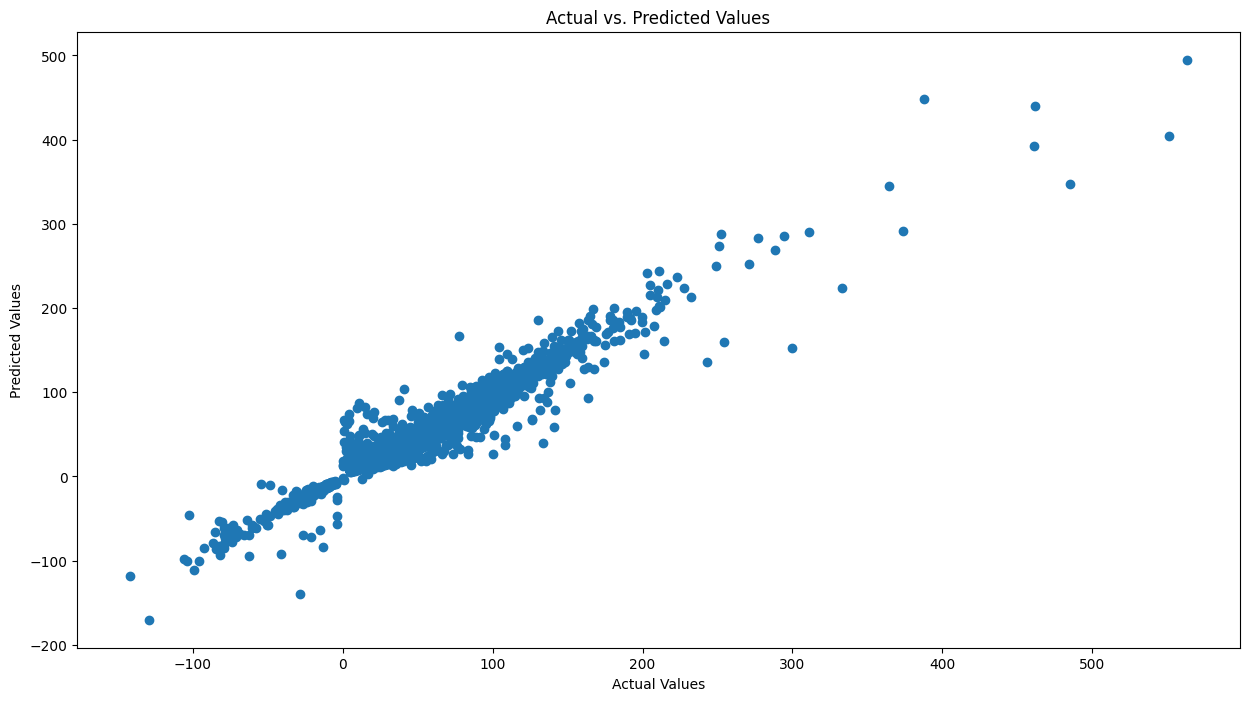

In [62]:
import xgboost as xgb

# xgb_model = xgb.XGBRegressor(random_state = 42) # Validation Accuracy : 0.9524
xgb_model = xgb.XGBRegressor(random_state = 700, eta = 0.0902, n_jobs = -1, max_depth = 7,
                            reg_lambda = 1, objective = 'reg:squarederror', n_estimators = 150,
                            ) # Validation Accuracy : 0.9583



xgb_model.fit(enc_X_train, y_train)
y_t_1 = xgb_model.predict(enc_X_train)


print(r2_score(y_train, y_t_1))


    
print(xgb_model.score(enc_X_val, y_val))
xgb_predictions = xgb_model.predict(enc_X_test)

print(xgb_predictions)
y_pred = xgb_model.predict(enc_X_val)


plt.scatter(y_val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [63]:
# from sklearn.pipeline import make_pipeline
# pipe_xgb = make_pipeline(
#     StandardScaler(),
#     xgb_model
# )

# pipe_xgb.fit(enc_X_train, y_train)
# pipe_xgb.score(enc_X_val, y_val)

In [64]:
# param_grid = {
#         'eta' : [0.1, 0.05],
#         'max_depth' : [7, 8]
#     }
# grid_xg = GridSearchCV(
#      xgb.XGBRegressor(random_state = 42,  n_jobs = -1),
#     param_grid,
#     cv = 2
    
# )
# grid_xg.fit(enc_X_train, y_train)
# print(grid_xg.best_params_)
# print(grid_xg.score(enc_X_val, y_val))

In [65]:
# grid_xg.best_params_

In [66]:
# predictions = grid_xg.predict(enc_X_test)
# print(predictions)

In [67]:
# from sklearn.ensemble import ExtraTreesRegressor

# param_grid = {
#     'criterion' : ["squared_error", "friedman_mse"],
#     'max_depth' : [10, 11]
# }

# grid_etr = GridSearchCV(
#     ExtraTreesRegressor(random_state = 42, n_jobs = -1),
#     param_grid,
#     cv = 2
# )



# grid_etr.fit(enc_X_train, y_train)
# print(grid_etr.best_params_)
# grid_etr.score(enc_X_val, y_val)

In [68]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score


sgd_reg = SGDRegressor(penalty='l2', loss = 'huber', random_state=42, shuffle = True,
                      learning_rate = 'adaptive',eta0=1e-1)  
sgd_reg.fit(enc_X_train, y_train)


y_pred = sgd_reg.predict(enc_X_val)
print(y_pred)

r2 = r2_score(y_val, y_pred)

print(r2)


[26.86683698 31.53446467 26.83990722 ... 23.46860101 18.33080911
 21.31861053]
0.6636185267822243


In [69]:
# from sklearn.neighbors import KNeighborsRegressor

# k = 5
# knn_model = KNeighborsRegressor(n_neighbors=k)
# knn_model.fit(enc_X_train, y_train)
# knn_model.score(enc_X_val, y_val)

# MLP Regressor (Multi-Layer Perceptron)

## Overview

MLP Regressor is a type of artificial neural network used for regression tasks. It consists of multiple layers of nodes (neurons) and is capable of learning complex relationships in data.

## Key Concepts

- **Artificial Neural Network (ANN):** A computational model inspired by the structure and functioning of the human brain.
- **Layers:** Input layer, hidden layers, and output layer.
- **Activation Function:** Non-linear function applied to nodes to introduce non-linearity.

## How MLP Regressor Works

1. **Forward Pass:** Input data is passed through the network layer by layer, generating predictions.
2. **Loss Calculation:** The difference between predicted and actual values is calculated using a loss function.
3. **Backpropagation:** The network adjusts its weights to minimize the loss.
4. **Optimization:** An optimization algorithm updates weights to improve model performance.

## Loss Functions

MLP Regressor minimizes a loss function to learn from data. Common loss functions for regression tasks include:

### Mean Squared Error (MSE)

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:
- $ n $ is the number of data points,
- \$y_i $ is the true value for the $ i $-th data point,
- $ \hat{y}_i $ is the predicted value for the $ i \$-th data point.

### Mean Absolute Error (MAE)

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| 
$$

## Backpropagation

Backpropagation is the training algorithm used in neural networks, including MLP Regressor. It involves:

1. **Forward Pass:** Computing the predicted values through the network.
2. **Loss Calculation:** Determining the difference between predictions and actual values.
3. **Backward Pass (Backpropagation):** Propagating the error backward through the network to adjust weights.
4. **Optimization:** Using an optimization algorithm (e.g., gradient descent) to update weights.

## Key Parameters

1. **Hidden Layers and Neurons:** Number and size of hidden layers.
2. **Activation Function:** Function applied to introduce non-linearity.
3. **Learning Rate ($ \eta $):** Controls the step size during weight updates.
4. **Batch Size:** Number of samples used in each iteration of training.

## Advantages

- **Adaptability:** Suitable for a wide range of tasks.
- **Non-Linearity:** Can model complex relationships.
- **Feature Learning:** Automatically learns relevant features.

## Limitations

- **Computational Intensity:** Training can be resource-intensive.
- **Hyperparameter Sensitivity:** Performance depends on careful tuning.



MLP Regressor is a powerful tool for regression tasks, capable of learning intricate patterns in data. Understanding its architecture and tuning hyperparameters are essential for achieving optimal performance.

In [70]:
# from sklearn.neural_network import MLPRegressor

# mlp_reg = MLPRegressor(
#     hidden_layer_sizes=(6, 6, 6),  # Adjust the number of hidden layers and units as needed
#     activation='relu',             # Choose the activation function (e.g., 'relu', 'tanh', 'sigmoid')
#     solver='adam',                 # Optimization algorithm
#     alpha=0.01,                  # Regularization strength
#     batch_size=200,             # Mini-batch size (or 'auto')
#     learning_rate='adaptive',      # Learning rate schedule
#     max_iter=300,                 # Maximum number of iterations
#     random_state=42,                 # Random seed for reproducibility   
# )

In [71]:
# mlp_reg.fit(enc_X_train, y_train)
# mlp_reg.score(enc_X_val, y_val)

In [72]:
# y_pred = mpl_reg.predict(enc_X_val)


# plt.scatter(y_val, y_pred)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values")
# plt.show()

In [73]:
# test_y_pred_mlp = mlp_reg.predict(enc_X_train)

# y_pred_mlp = mlp_reg.predict(enc_X_val)
# # Calculate the R^2 score
# print(r2_score(y_train, test_y_pred_mlp))
# print(r2_score(y_val, y_pred_mlp))

# mlp_reg_predictions_1 = mlp_reg.predict(enc_X_test)
# print(mlp_reg_predictions_1)


| Model                   | R2 Scores in Validation data |
|-------------------------|----------|
| Linear Regression       | 0.7727    |
| Ridge Regression        | 0.7727    |
| Lasso Regression        | 0.7589     |
| Decision Tree Regressor | 0.9491    |
| SVR (Linear Kernel)     | 0.8527     |
| Random Forest Regressor | 0.9527     |
| MLPRegressor            | 0.922      |
| XGBoost Regressor       | **0.9645** |



In this dataset, XGBoost Regressor has the highest R2 score, indicating better predictive performance compared to other models

In [74]:
submission = pd.DataFrame(columns = ['ID', 'total_amount'])
submission['ID'] = [i + 1 for i in range(len(xgb_predictions))]
submission['total_amount'] = xgb_predictions
submission.to_csv('submission.csv', index = False)